In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [ ]:
cancer = pd.read_csv("cancer patient dataset2.csv")

In [ ]:
cancer.head()

,Patient ID,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,2,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,3,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,4,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,5,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
cancer.shape
print(f"The Number Of Rows : {cancer.shape[0]}")
print(f"The Number Of Columns is : {cancer.shape[1]}")


The Number Of Rows : 1000
The Number Of Columns is : 25


In [ ]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient ID                1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [ ]:
cancer.isnull().sum()

Patient ID                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [ ]:
duplicated_values = cancer[cancer.duplicated()]
duplicated_values

,Patient ID,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level


In [ ]:
cancer.nunique()

Patient ID                  1000
Age                           40
Gender                         2
Air Pollution                  8
Alcohol use                    8
Dust Allergy                   8
OccuPational Hazards           8
Genetic Risk                   7
chronic Lung Disease           7
Balanced Diet                  7
Obesity                        7
Smoking                        8
Passive Smoker                 8
Chest Pain                     9
Coughing of Blood              9
Fatigue                        8
Weight Loss                    8
Shortness of Breath            8
Wheezing                       8
Swallowing Difficulty          8
Clubbing of Finger Nails       9
Frequent Cold                  7
Dry Cough                      7
Snoring                        7
Level                          3
dtype: int64

In [ ]:
encoder = LabelEncoder()
encoded_level = encoder.fit_transform(cancer['Level'])

In [ ]:
encoded_level

array([1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
encoded_level_df = pd.DataFrame(encoded_level)

In [ ]:
cancer = cancer.drop('Level', axis=1)
cancer = pd.concat([cancer,encoded_level_df], axis=1)

In [ ]:
# The Column Level is now renamed 0

cancer.columns

Index([              'Patient ID',                      'Age',
                         'Gender',            'Air Pollution',
                    'Alcohol use',             'Dust Allergy',
           'OccuPational Hazards',             'Genetic Risk',
           'chronic Lung Disease',            'Balanced Diet',
                        'Obesity',                  'Smoking',
                 'Passive Smoker',               'Chest Pain',
              'Coughing of Blood',                  'Fatigue',
                    'Weight Loss',      'Shortness of Breath',
                       'Wheezing',    'Swallowing Difficulty',
       'Clubbing of Finger Nails',            'Frequent Cold',
                      'Dry Cough',                  'Snoring',
                                0],
      dtype='object')

In [ ]:
name_mapping = {'encoded_level': 'Level'}

In [ ]:
cancer = cancer.rename(columns=name_mapping)

In [ ]:
# Rename the column Level wit it's original name

cancer.columns=[         'Patient Id',  'Age',                           'Gender',
                  'Air Pollution',              'Alcohol use',
                   'Dust Allergy',     'OccuPational Hazards',
                   'Genetic Risk',     'chronic Lung Disease',
                  'Balanced Diet',                  'Obesity',
                        'Smoking',           'Passive Smoker',
                     'Chest Pain',        'Coughing of Blood',
                        'Fatigue',              'Weight Loss',
            'Shortness of Breath',                 'Wheezing',
          'Swallowing Difficulty', 'Clubbing of Finger Nails',
                  'Frequent Cold',                'Dry Cough',
                        'Snoring',            'Missing_cloumn']

In [ ]:
desired_columns = ['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring', 'Level']

missing_columns = set(desired_columns) - set(cancer.columns)
extra_columns = set(cancer.columns) - set(desired_columns)

print("Missing columns:", missing_columns)
print("Extra columns:", extra_columns)

Missing columns: {'Level'}
Extra columns: {'Missing_cloumn', 'Patient Id'}


In [ ]:
# Sample DataFrame with 'Level' column containing categorical values
data = {'Level': ['Low', 'Medium', 'High', 'High', 'Medium', 'Low']}
df = pd.DataFrame(data)

# Define a dictionary to map categorical values to numeric values
mapping = {'Low': 1, 'Medium': 2, 'High': 3}

# Apply mapping to the 'Level' column in DataFrame df
df['Level'] = df['Level'].map(mapping)

# Print the updated DataFrame
print(df)

   Level
0      1
1      2
2      3
3      3
4      2
5      1


In [ ]:
cancer.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Missing_cloumn
0,1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,1
1,2,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2
2,3,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,0
3,4,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,0
4,5,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,0


<Axes: xlabel='Age', ylabel='Density'>

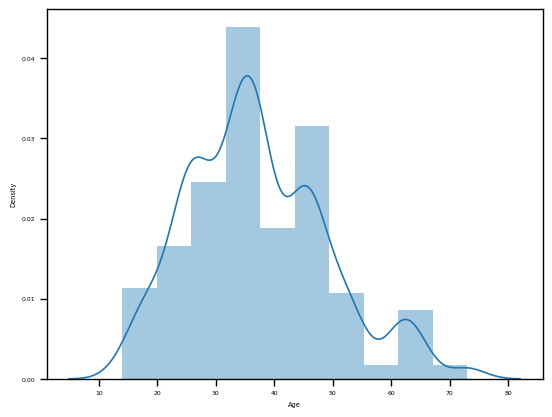

In [ ]:
sns.distplot(cancer['Age'], bins=10)

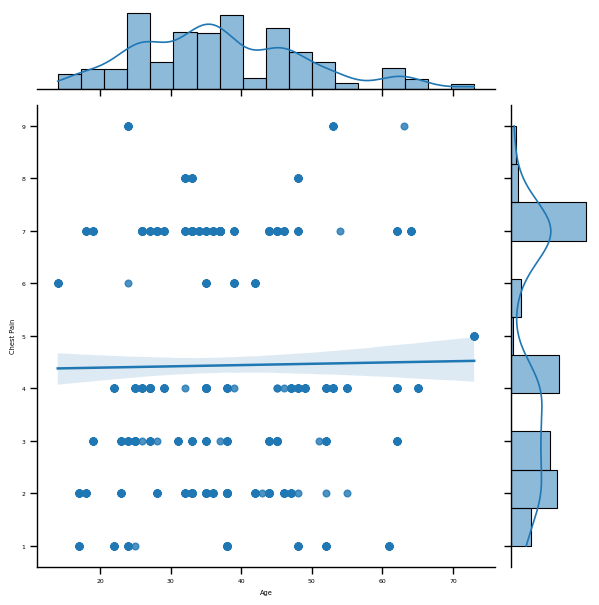

In [ ]:
sns.jointplot(x='Age', y='Chest Pain', data=cancer, kind='reg')

<Axes: >

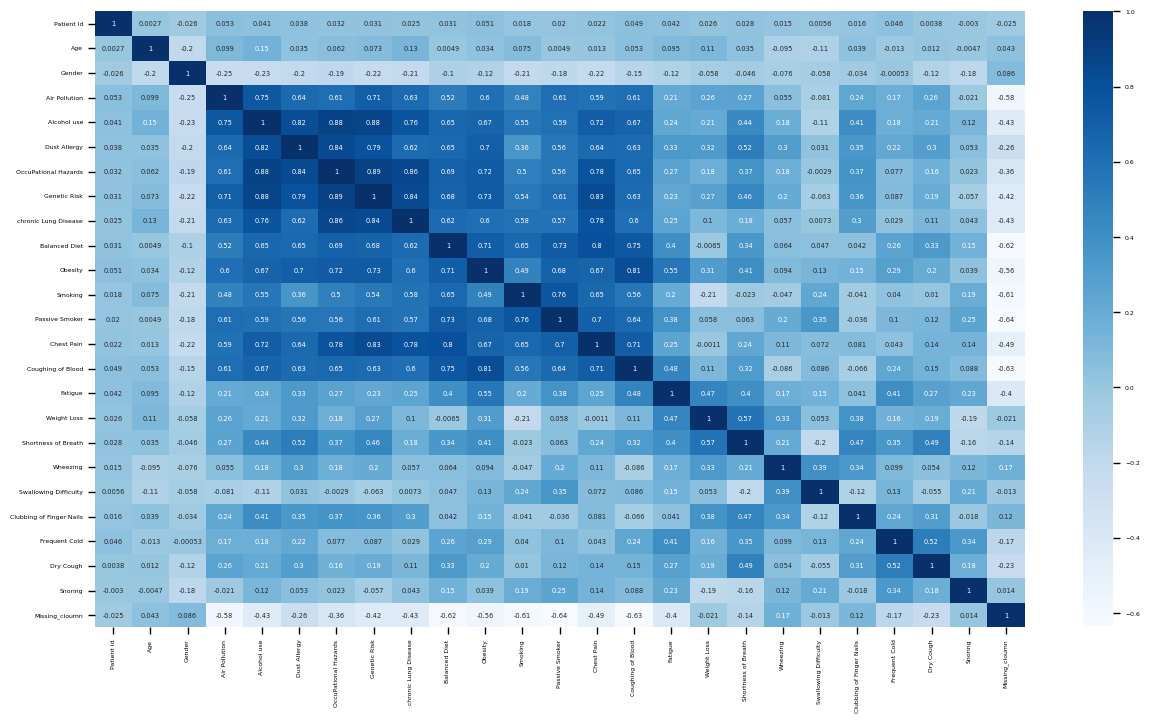

In [ ]:
plt.figure(figsize=(15,8))
sns.set_context('paper', font_scale=0.5)

cancer_mx = cancer.corr()
sns.heatmap(cancer_mx, annot=True, cmap='Blues')

In [ ]:
cancer = cancer.replace('P1', np.nan)

<Figure size 1500x800 with 0 Axes>

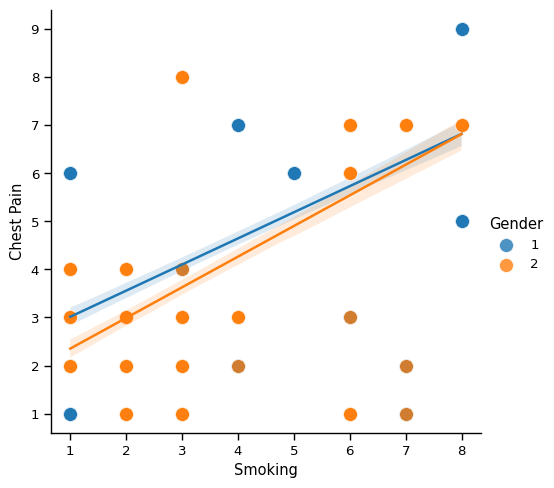

In [ ]:
plt.figure(figsize=(15,8))
sns.set_context('paper', font_scale=1.1)
sns.lmplot(x='Smoking', y='Chest Pain', hue='Gender',data=cancer,
          scatter_kws={'s':100, 'linewidth': 0.5, 'edgecolor':'w'})

<Figure size 1000x600 with 0 Axes>

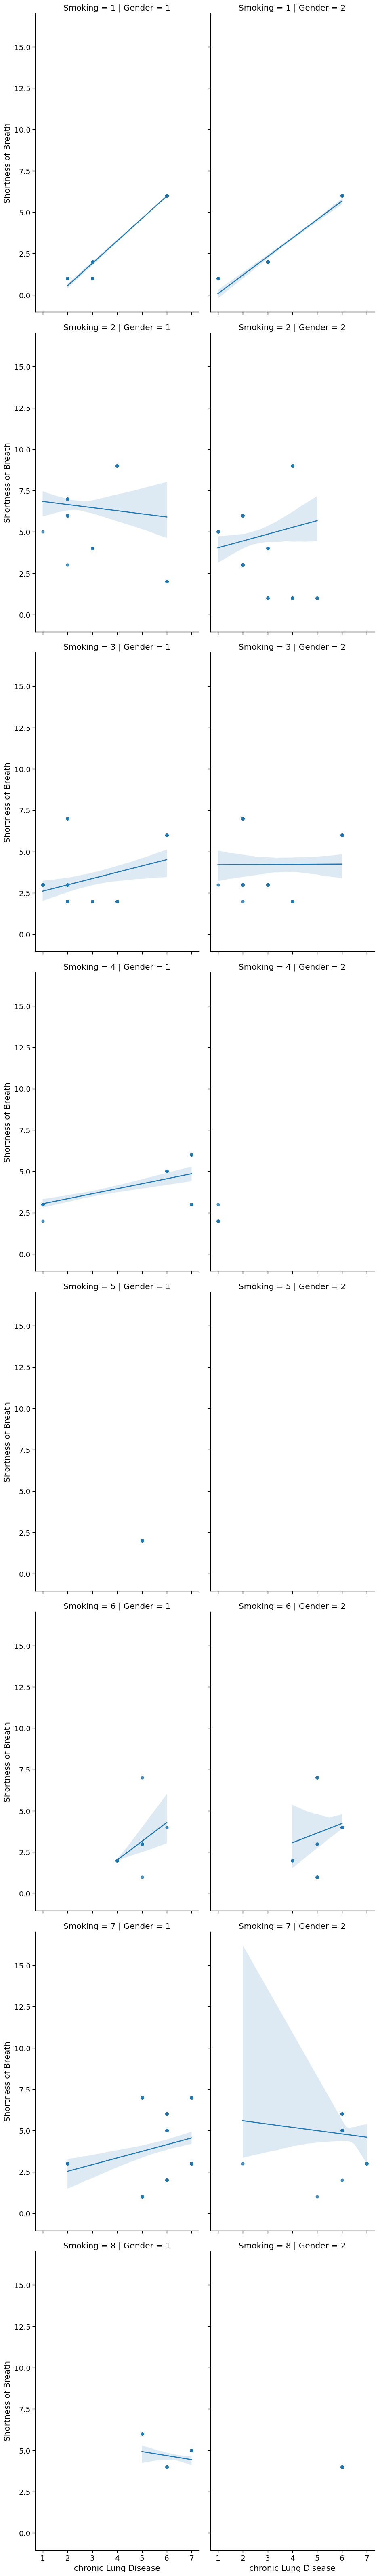

In [ ]:
plt.figure(figsize=(10,6))
sns.set_context('paper', font_scale=1.5)
sns.lmplot(x='chronic Lung Disease', y='Shortness of Breath', col='Gender', row='Smoking', data=cancer, height=8, aspect=0.6)

In [ ]:
#x_train_encoded = pd.get_dummies(x_train) #Here the data is getting weird, PatientId's from previous table which were used to identify the Patients are now in the columns table.
#x_train_encoded.head() #https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [ ]:
# Drop unneeded columns
cancer = cancer.drop(['Patient Id'], axis=1)

In [ ]:
# Split features and target variable
x = cancer.iloc[:, :-1]
y = cancer.iloc[:, -1]

In [ ]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Fit the model
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions on the test data
pred = model_lr.predict(x_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.995


In [ ]:
# Store Patient Id separately
patient_ids_test = x_test.index

In [ ]:
# Make predictions using the logistic regression model
pred = model_lr.predict(x_test_encoded)

In [ ]:
# Concatenate patient IDs with predictions for analysis
results = pd.concat([pd.DataFrame(patient_ids_test, columns=['Patient Id']), pd.DataFrame(pred, columns=['Predicted_Label'])], axis=1)

# Print out the patient ID and predicted label for each individual
for index, row in results.iterrows():
    print("Patient ID:", row['Patient Id'], "\tPredicted Label:", row['Predicted_Label'])


Patient ID: 521 	Predicted Label: 2
Patient ID: 737 	Predicted Label: 2
Patient ID: 740 	Predicted Label: 0
Patient ID: 660 	Predicted Label: 1
Patient ID: 411 	Predicted Label: 2
Patient ID: 678 	Predicted Label: 1
Patient ID: 626 	Predicted Label: 2
Patient ID: 513 	Predicted Label: 2
Patient ID: 859 	Predicted Label: 1
Patient ID: 136 	Predicted Label: 1
Patient ID: 811 	Predicted Label: 2
Patient ID: 76 	Predicted Label: 0
Patient ID: 636 	Predicted Label: 2
Patient ID: 973 	Predicted Label: 0
Patient ID: 938 	Predicted Label: 1
Patient ID: 899 	Predicted Label: 0
Patient ID: 280 	Predicted Label: 2
Patient ID: 883 	Predicted Label: 0
Patient ID: 761 	Predicted Label: 2
Patient ID: 319 	Predicted Label: 2
Patient ID: 549 	Predicted Label: 2
Patient ID: 174 	Predicted Label: 0
Patient ID: 371 	Predicted Label: 2
Patient ID: 527 	Predicted Label: 0
Patient ID: 210 	Predicted Label: 2
Patient ID: 235 	Predicted Label: 0
Patient ID: 101 	Predicted Label: 2
Patient ID: 986 	Predicted La

In [ ]:
# Concatenate patient IDs with predictions for analysis
results = pd.concat([pd.DataFrame(patient_ids_test), pd.DataFrame(pred, columns=['Predicted_Label'])], axis=1)


In [ ]:

# Merge results with the original test dataset
final_results = pd.merge(x_test, results, left_index=True, right_index=True)

# Print the final results
print(final_results)





     Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
136   65       1              6            8             7   
76    23       1              3            2             4   
174   45       2              1            2             3   
101   38       2              2            1             5   
139   33       1              6            7             7   
198   44       1              6            7             7   
59    38       2              2            3             5   
96    37       1              6            7             7   
23    29       2              6            7             7   
30    35       2              2            6             2   
10    44       1              6            7             7   
54    38       2              5            2             3   
70    44       1              1            2             3   
107   44       1              6            7             7   
39    45       2              1            2             4   
66    45

In [ ]:
# Save the final results to a CSV file
final_results.to_csv('predicted_resultsfinal.csv', index=False)